<a href="https://colab.research.google.com/github/OSegun/Deep-Learning-Projects/blob/main/tensor_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import seaborn as sns

c:\Users\HP\anaconda3\envs\pytorch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
cars = 'https://gist.githubusercontent.com/noamross/e5d3e859aa0c794be10b/raw/b999fb4425b54c63cab088c0ce2c0d6ce961a563/cars.csv'
df = pd.read_csv(cars)
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


<AxesSubplot:xlabel='wt', ylabel='mpg'>

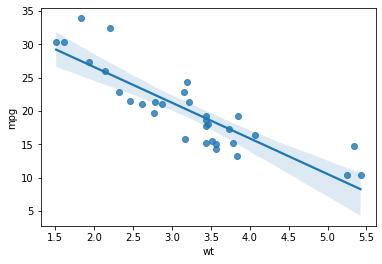

In [ ]:
sns.regplot(x='wt', y='mpg', data=df)

In [ ]:
# convert the data to tensor
xn = np.array(df.wt, dtype=np.float).reshape(-1,1)
X = torch.from_numpy(xn)
yn = df.mpg.tolist()
y = torch.tensor(yn)

C:\Users\HP\AppData\Local\Temp\ipykernel_31232\3167709856.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  xn = np.array(df.wt, dtype=np.float).reshape(-1,1)


In [ ]:
# weight
w = torch.rand(1, requires_grad=True, dtype=torch.float64)
# bias
b = torch.rand(1, requires_grad=True, dtype=torch.float64)

In [ ]:
num_epochs = 1000 # number of epochs
lr = 0.001 # Learning rate
for epoch in range(num_epochs):
    for i in range(len(X)):
        # forward pass
        y_pred = X[i] * w + b
        # calculate loss
        tensor_loss = torch.pow(y_pred - y[i],2)
        # backward pass
        tensor_loss.backward()
        # Extract loss
        loss = tensor_loss.data[0]
        # update weights and biases
        with torch.no_grad():
            w -= w.grad * lr
            b -= b.grad * lr
            w.grad.zero_()
            b.grad.zero_()
    print(loss)

tensor(146.5192, dtype=torch.float64)
tensor(77.1258, dtype=torch.float64)
tensor(52.7263, dtype=torch.float64)
tensor(42.9689, dtype=torch.float64)
tensor(38.6541, dtype=torch.float64)
tensor(36.5551, dtype=torch.float64)
tensor(35.4066, dtype=torch.float64)
tensor(34.6782, dtype=torch.float64)
tensor(34.1387, dtype=torch.float64)
tensor(33.6861, dtype=torch.float64)
tensor(33.2747, dtype=torch.float64)
tensor(32.8839, dtype=torch.float64)
tensor(32.5047, dtype=torch.float64)
tensor(32.1327, dtype=torch.float64)
tensor(31.7661, dtype=torch.float64)
tensor(31.4041, dtype=torch.float64)
tensor(31.0462, dtype=torch.float64)
tensor(30.6922, dtype=torch.float64)
tensor(30.3421, dtype=torch.float64)
tensor(29.9956, dtype=torch.float64)
tensor(29.6529, dtype=torch.float64)
tensor(29.3138, dtype=torch.float64)
tensor(28.9783, dtype=torch.float64)
tensor(28.6463, dtype=torch.float64)
tensor(28.3179, dtype=torch.float64)
tensor(27.9929, dtype=torch.float64)
tensor(27.6714, dtype=torch.float64)


In [ ]:
print(f"Weight: {w.item()}\nBias: {b.item()}")

Weight: -5.230315236624106
Bias: 36.80854006525303


In [ ]:
yy_pred = (torch.tensor(df.wt) * w + b).detach().numpy()

<AxesSubplot:xlabel='wt'>

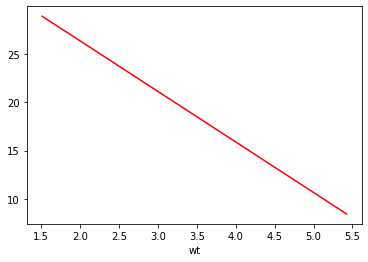

In [ ]:
sns.lineplot(x=df.wt, y=yy_pred, color='red')

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(xn, yn)
print(f"Slope: {model.coef_[0]}\nBias: {model.intercept_}")

Slope: -5.344471572722677
Bias: 37.285126167342035
